In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Filename: reduction.py
# @License: BSD 3-clause (http://www.opensource.org/licenses/BSD-3-Clause)

import pathlib
import numpy
import os


def run_reduction(data_dir):
    """This function must run the entire CCD reduction process. You can implement it
    in any way that you want but it must perform a valid reduction for the two
    science frames in the dataset using the functions that you have implemented in
    this module. Then perform aperture photometry on at least one of the science
    frames, using apertures and sky annuli that make sense for the data.

    No specific output is required but make sure the function prints/saves all the
    relevant information to the screen or to a file, and that any plots are saved to
    PNG or PDF files.

    """
    
    # data_dir = '/work/ccd-reductions-marcosmarro/ccd_reductions_data'

    
    # os.chdir()
    # current_dir = os.getcwd()
    # print(f"Current working directory: {current_dir}")

    from bias import create_median_bias
    from darks import create_median_dark
    from flats import create_median_flat, plot_flat
    from photometry import do_aperture_photometry, plot_radial_profile
    from ptc import calculate_gain, calculate_readout_noise
    from science import reduce_science_frame

    
    bias_files = sorted(pathlib.Path(data_dir).glob("Bias*.fit*"))
    dark_files = sorted(pathlib.Path(data_dir).glob("Dark*.fit*"))
    flat_files = sorted(pathlib.Path(data_dir).glob("AutoFlat*.fit*"))
    science_files = sorted(pathlib.Path(data_dir).glob("kelt*.fit*"))

    
    median_bias_filename = './Median-Bias.fits'
    median_dark_filename = './Median-Dark.fits'
    median_flat_filename = './Median-AutoFlat.fits'


    median_bias = create_median_bias(bias_files, median_bias_filename)
    median_dark = create_median_dark(dark_files, median_bias_filename, median_dark_filename)
    median_flat = create_median_flat(flat_files, median_bias_filename, median_flat_filename)


    plot_flat(median_flat_filename, ouput_filename="median_flat.png", profile_ouput_filename="median_flat_profile.png")
    

    gain = calculate_gain(flat_files)
    print(f"Gain = {gain:.2f} e-/ADU")

    readout_noise = calculate_readout_noise(bias_files, gain)
    print(f"Readout Noise = {readout_noise:.2f} e-")


    for i in range(len(science_files)):
        science_filename = science_files[i]
        
        reduced_science = reduce_science_frame(
        science_filename,
        median_bias_filename,
        median_flat_filename,
        median_dark_filename,
        reduced_science_filename=f"reduced_science{i+1}.fits"
        )


    reduced_science_files = sorted(pathlib.Path('./').glob("reduced_science*.fit*"))
    
    reduced_science_image = reduced_science_files[0]
    positions = [(40, 331), (410, 300)]
    radii = numpy.linspace(.1, 30, 200)
    sky_radius_in = 35
    sky_annulus_width = 5
    
    aperture_photometry_data = do_aperture_photometry(reduced_science_image,
    positions,
    radii,
    sky_radius_in,
    sky_annulus_width,
    )

    plot_radial_profile(aperture_photometry_data, output_filename="radial_profile.png")
    
    
    return


/opt/conda/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:868: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


Gain = 1.57 e-/ADU
Readout Noise = 12.96 e-


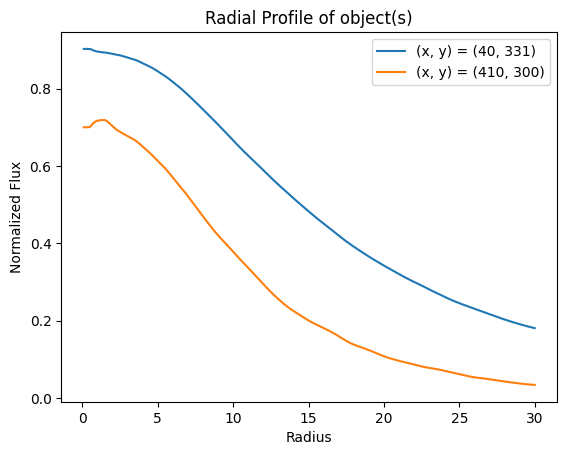

In [4]:
run_reduction('../../ccd_reductions_data')